# Machine Learning Part
* goal of this notebook is to develop code for the machine learning portion
    * dataset loading
    * model
    * evaluation metrics
* code should be added into qdanalysis and refactored aferwards

In [1]:
import tensorflow as tf
from tensorflow import keras

from qdanalysis.models import adapt_resnet50

import pathlib

2024-02-18 19:25:48.021066: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-18 19:25:48.051776: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-18 19:25:48.051801: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-18 19:25:48.052587: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-18 19:25:48.058051: I tensorflow/core/platform/cpu_feature_guar

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
train_dir = '../prepared datasets/CERUG/CN'
test_dir = '../prepared datasets/CERUG/EN'

In [6]:
label_mode = 'categorical'
#shape image will be resized to (figure out ideal values later)
input_shape = (128, 128, 3)
seed = 42
validation_split = 0.2

#due to nature of data, the test and train splits are defined beforehand
train_data = keras.preprocessing.image_dataset_from_directory(train_dir, 
                                                              label_mode=label_mode, 
                                                              image_size=input_shape[:2], 
                                                              seed=seed, 
                                                              validation_split=validation_split, 
                                                              subset='training')
writer_classes = train_data.class_names

Found 463507 files belonging to 105 classes.
Using 370806 files for training.


2024-02-18 19:26:40.857241: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22037 MB memory:  -> device: 0, name: NVIDIA TITAN RTX, pci bus id: 0000:65:00.0, compute capability: 7.5


In [7]:
len(writer_classes)

105

In [8]:
validation_data = keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                   label_mode=label_mode,
                                                                   image_size=input_shape[:2],
                                                                   seed=seed,
                                                                   validation_split=validation_split,
                                                                   subset='validation')

Found 463507 files belonging to 105 classes.
Using 92701 files for validation.


In [9]:
model = adapt_resnet50(input_shape, len(writer_classes))

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 1000)              2049000   
                                                                 
 dense_1 (Dense)             (None, 105)               105105    
                                                                 
Total params: 25741817 (98.20 MB)
Trainable params: 2154105 (8.22 MB)
Non-trainable params: 23587712 (89.98 MB)
_______________

In [10]:
# optimizer and loss taken from https://stackoverflow.com/questions/71704268/using-tf-keras-utils-image-dataset-from-directory-with-label-list
optimizer = tf.keras.optimizers.Nadam(
    learning_rate=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-07,
    name='Nadam'
)

lossfn = tf.keras.losses.CategoricalCrossentropy()

metrics = [
    keras.metrics.CategoricalAccuracy(),
    keras.metrics.Precision(),
    keras.metrics.Recall()
]

model.compile(optimizer=optimizer, loss=lossfn, metrics=metrics)

In [9]:
epochs = 100
history = model.fit(train_data, epochs=epochs, validation_data=validation_data)

Epoch 1/100


2024-02-15 03:25:56.005950: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-02-15 03:25:56.977947: I external/local_xla/xla/service/service.cc:168] XLA service 0xd1c6c40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-15 03:25:56.977985: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA TITAN RTX, Compute Capability 7.5
2024-02-15 03:25:56.990740: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1707996357.102302  342844 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


11588/11588 [==============================] - 258s 22ms/step - loss: 4.0538 - categorical_accuracy: 0.0747 - precision: 0.6369 - recall: 0.0019 - val_loss: 3.7826 - val_categorical_accuracy: 0.1012 - val_precision: 0.6320 - val_recall: 0.0047
Epoch 2/100
11588/11588 [==============================] - 255s 22ms/step - loss: 3.6617 - categorical_accuracy: 0.1204 - precision: 0.6685 - recall: 0.0058 - val_loss: 3.6078 - val_categorical_accuracy: 0.1258 - val_precision: 0.6553 - val_recall: 0.0079
Epoch 3/100
11588/11588 [==============================] - 252s 22ms/step - loss: 3.5180 - categorical_accuracy: 0.1425 - precision: 0.6980 - recall: 0.0090 - val_loss: 3.5085 - val_categorical_accuracy: 0.1408 - val_precision: 0.6655 - val_recall: 0.0103
Epoch 4/100
11588/11588 [==============================] - 250s 22ms/step - loss: 3.4230 - categorical_accuracy: 0.1576 - precision: 0.7157 - recall: 0.0118 - val_loss: 3.4408 - val_categorical_accuracy: 0.1510 - val_precision: 0.6599 - val_rec

In [11]:
#due to nature of data, the test and train splits are defined beforehand
test_data = keras.preprocessing.image_dataset_from_directory(test_dir, 
                                                              label_mode=label_mode, 
                                                              image_size=input_shape[:2], 
                                                              seed=seed)
writer_classes_test = test_data.class_names

Found 137258 files belonging to 105 classes.


In [12]:
writer_classes

['Writer0101',
 'Writer0202',
 'Writer0303',
 'Writer0404',
 'Writer0505',
 'Writer0606',
 'Writer0707',
 'Writer0808',
 'Writer0909',
 'Writer1010',
 'Writer1111',
 'Writer1212',
 'Writer1313',
 'Writer1414',
 'Writer1515',
 'Writer1616',
 'Writer1717',
 'Writer1818',
 'Writer1919',
 'Writer2020',
 'Writer2121',
 'Writer2222',
 'Writer2323',
 'Writer2424',
 'Writer2525',
 'Writer2626',
 'Writer2727',
 'Writer2828',
 'Writer2929',
 'Writer3030',
 'Writer3131',
 'Writer3232',
 'Writer3333',
 'Writer3434',
 'Writer3535',
 'Writer3636',
 'Writer3737',
 'Writer3838',
 'Writer3939',
 'Writer4040',
 'Writer4141',
 'Writer4242',
 'Writer4343',
 'Writer4444',
 'Writer4545',
 'Writer4646',
 'Writer4747',
 'Writer4848',
 'Writer4949',
 'Writer5050',
 'Writer5151',
 'Writer5252',
 'Writer5353',
 'Writer5454',
 'Writer5555',
 'Writer5656',
 'Writer5757',
 'Writer5858',
 'Writer5959',
 'Writer6060',
 'Writer6161',
 'Writer6262',
 'Writer6363',
 'Writer6464',
 'Writer6565',
 'Writer6666',
 'Writer67

In [13]:
writer_classes_test

['Writer0101',
 'Writer0202',
 'Writer0303',
 'Writer0404',
 'Writer0505',
 'Writer0606',
 'Writer0707',
 'Writer0808',
 'Writer0909',
 'Writer1010',
 'Writer1111',
 'Writer1212',
 'Writer1313',
 'Writer1414',
 'Writer1515',
 'Writer1616',
 'Writer1717',
 'Writer1818',
 'Writer1919',
 'Writer2020',
 'Writer2121',
 'Writer2222',
 'Writer2323',
 'Writer2424',
 'Writer2525',
 'Writer2626',
 'Writer2727',
 'Writer2828',
 'Writer2929',
 'Writer3030',
 'Writer3131',
 'Writer3232',
 'Writer3333',
 'Writer3434',
 'Writer3535',
 'Writer3636',
 'Writer3737',
 'Writer3838',
 'Writer3939',
 'Writer4040',
 'Writer4141',
 'Writer4242',
 'Writer4343',
 'Writer4444',
 'Writer4545',
 'Writer4646',
 'Writer4747',
 'Writer4848',
 'Writer4949',
 'Writer5050',
 'Writer5151',
 'Writer5252',
 'Writer5353',
 'Writer5454',
 'Writer5555',
 'Writer5656',
 'Writer5757',
 'Writer5858',
 'Writer5959',
 'Writer6060',
 'Writer6161',
 'Writer6262',
 'Writer6363',
 'Writer6464',
 'Writer6565',
 'Writer6666',
 'Writer67

In [14]:
results = model.evaluate(test_data)

2024-02-18 19:27:47.572172: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904


4290/4290 [==============================] - 75s 17ms/step - loss: 5.6058 - categorical_accuracy: 0.0082 - precision: 0.0217 - recall: 7.2856e-06


In [19]:
#custom evaluation loop
#https://www.tensorflow.org/guide/keras/writing_a_training_loop_from_scratch
#https://stackoverflow.com/questions/48600929/how-to-calculate-top-k-in-class-accuracies-using-tensorflow-slim-metrics
#https://stackoverflow.com/questions/45930750/how-to-output-per-class-accuracy-in-keras

#basic eval loop for testing
acc_metric = keras.metrics.CategoricalAccuracy()

In [20]:
for x_batch, y_batch in test_data:
    val_logits = model(x_batch, training=False)
    acc_metric.update_state(y_batch, val_logits)

val_acc = acc_metric.result()


In [24]:
#note this is from chatgpt. be REALLY careful abotu using this
import numpy as np
def calculate_top_k_accuracy_per_class(model, dataset, k=5):
    # Assuming dataset is a tf.data.Dataset yielding (input, true_labels) tuples
    # and true_labels are one-hot encoded
    
    # Initialize counters
    correct_predictions_per_class = np.zeros((model.output_shape[-1],))
    total_predictions_per_class = np.zeros((model.output_shape[-1],))
    
    for inputs, true_labels in dataset:
        # Make predictions
        preds = model(inputs, training=False)
        
        # Get top-k predictions indices
        top_k_preds = np.argsort(preds, axis=-1)[:, -k:]
        
        # Convert one-hot labels to indices
        true_labels_indices = np.argmax(true_labels, axis=-1)
        
        # Update counts
        for i, true_label in enumerate(true_labels_indices):
            total_predictions_per_class[true_label] += 1
            if true_label in top_k_preds[i]:
                correct_predictions_per_class[true_label] += 1
    
    # Calculate top-k accuracy per class
    top_k_accuracy_per_class = correct_predictions_per_class / total_predictions_per_class
    
    return top_k_accuracy_per_class

In [25]:
calculate_top_k_accuracy_per_class(model, test_data, k=5)

array([1.94256757e-02, 0.00000000e+00, 8.21018062e-04, 0.00000000e+00,
       0.00000000e+00, 9.05245347e-02, 1.62601626e-03, 3.74812594e-03,
       0.00000000e+00, 6.23700624e-03, 8.29367777e-02, 3.03720577e-03,
       0.00000000e+00, 0.00000000e+00, 3.79746835e-02, 0.00000000e+00,
       5.56438792e-03, 7.97720798e-02, 1.89137380e-01, 2.17076700e-03,
       1.04347826e-02, 4.04172099e-02, 1.47710487e-03, 1.24826630e-02,
       2.50467290e-01, 7.28744939e-03, 3.20512821e-02, 3.23773585e-01,
       0.00000000e+00, 2.31481481e-03, 6.53594771e-04, 0.00000000e+00,
       2.38961039e-01, 0.00000000e+00, 2.45398773e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.54202005e-02, 0.00000000e+00,
       6.26029654e-02, 0.00000000e+00, 0.00000000e+00, 3.91666667e-02,
       0.00000000e+00, 0.00000000e+00, 1.39116203e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.54651163e-01, 4.13844996e-02,
       3.17965024e-03, 0.00000000e+00, 0.00000000e+00, 2.37785016e-01,
      

In [15]:
model.save('./output/models/test_model.h5')

/home/digitalstorm/anaconda3/envs/mastersthesis/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
history.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'precision', 'recall', 'val_loss', 'val_categorical_accuracy', 'val_precision', 'val_recall'])

In [27]:
import json
history_dict = history.history

with open('./output/models/test_model_history.json', 'w') as file:
    json.dump(history_dict, file)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


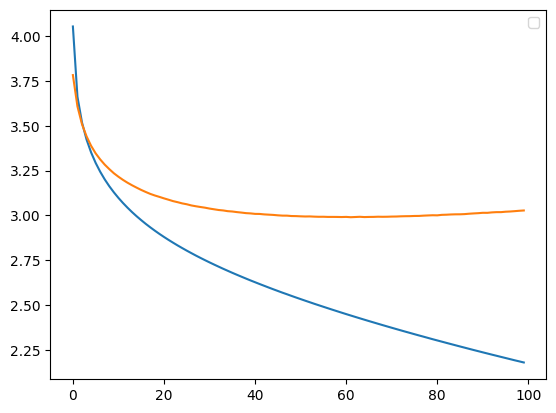

In [29]:
import matplotlib.pyplot as plt

plt.plot(range(epochs), history_dict['loss'])
plt.plot(range(epochs), history_dict['val_loss'])
plt.legend()
plt.show()